In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data = pd.read_csv("../dataset/kc_tax.csv")
data.tail(10)

,TaxAssessedValue,SqFtTotLiving,ZipCode
498239,427000.0,2410,98056.0
498240,247000.0,990,98056.0
498241,247000.0,980,98056.0
498242,312000.0,1660,98056.0
498243,392000.0,2570,98056.0
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0
498248,286000.0,1310,98056.0


In [12]:
impuestos_filtrados = data.loc[(data.TaxAssessedValue<750_000) & (data.SqFtTotLiving>100)]
impuestos_filtrados

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Text(0, 0.5, 'Tax-Assessed Value')

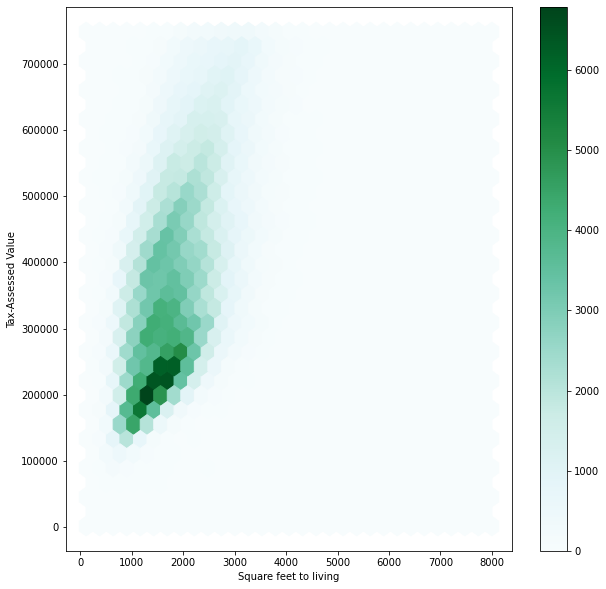

In [4]:
ax = impuestos_filtrados.plot.hexbin(x="SqFtTotLiving",y="TaxAssessedValue",gridsize=30,figsize=(10,10),sharex=False)

ax.set_xlabel("Square feet to living")
ax.set_ylabel("Tax-Assessed Value")

In [6]:
import seaborn as sns

Text(0, 0.5, 'Tax assessed value')

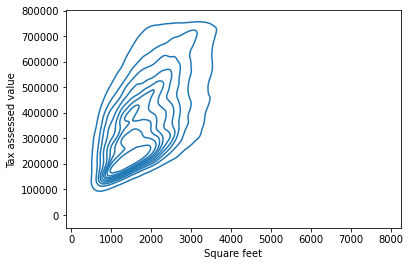

In [6]:
# Generar un contour plot
ax = sns.kdeplot(x=impuestos_filtrados.SqFtTotLiving,y=impuestos_filtrados.TaxAssessedValue)
ax.set_xlabel("Square feet")
ax.set_ylabel("Tax assessed value")

In [7]:
loans = pd.read_csv("../dataset/lc_loans.csv")

loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [12]:
crosstab = loans.pivot_table(index="grade",columns="status",aggfunc=lambda x:len(x),margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [19]:
df = crosstab.loc["A":"G"].copy()
df.loc[:,"Charged Off":"Late"] = df.loc[:,"Charged Off":"Late"].div(df.All,axis=0)*100

df.All = df.All / sum(df.All)*100
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,2.154780,69.045386,28.152849,0.646986,16.074561
B,4.005439,70.901262,23.540077,1.553222,29.352871
C,4.982834,73.570217,19.149535,2.297415,26.803870
D,6.740983,71.732838,18.418891,3.107288,16.470826
E,8.165728,70.793587,17.092863,3.947822,7.717741
F,11.825790,65.437074,18.040918,4.696218,2.861445
G,12.619562,61.400802,19.839556,6.140080,0.718687


In [2]:
data = pd.read_csv("../dataset/airline_stats.csv")

data

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


Text(0, 0.5, 'Daily % of delayed flights by the weather')

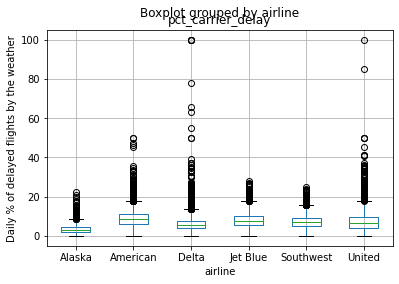

In [5]:
ax = data.boxplot(by='airline',column="pct_carrier_delay")
ax.set_ylabel("Daily % of delayed flights by the weather")

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Daily % of carrier delayed flights')

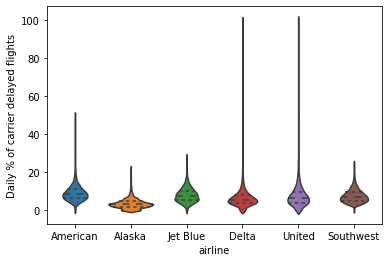

In [10]:
ax = sns.violinplot(data.airline,data.pct_carrier_delay,inner="quartile",figsize=(20,20))

ax.set_ylabel("Daily % of carrier delayed flights")

In [17]:
zip_codes = impuestos_filtrados.ZipCode.unique()
zip_codes.sort()
zip_codes

array([0.0000000e+00, 9.8000000e+01, 8.9118000e+04, 9.0055000e+04,
       9.0108000e+04, 9.0855000e+04, 9.5055000e+04, 9.5059000e+04,
       9.5125000e+04, 9.8000000e+04, 9.8001000e+04, 9.8002000e+04,
       9.8003000e+04, 9.8004000e+04, 9.8005000e+04, 9.8006000e+04,
       9.8007000e+04, 9.8008000e+04, 9.8010000e+04, 9.8011000e+04,
       9.8013000e+04, 9.8014000e+04, 9.8017000e+04, 9.8019000e+04,
       9.8021000e+04, 9.8022000e+04, 9.8023000e+04, 9.8024000e+04,
       9.8027000e+04, 9.8028000e+04, 9.8029000e+04, 9.8030000e+04,
       9.8031000e+04, 9.8032000e+04, 9.8033000e+04, 9.8034000e+04,
       9.8035000e+04, 9.8038000e+04, 9.8039000e+04, 9.8040000e+04,
       9.8042000e+04, 9.8043000e+04, 9.8045000e+04, 9.8047000e+04,
       9.8050000e+04, 9.8051000e+04, 9.8052000e+04, 9.8053000e+04,
       9.8054000e+04, 9.8055000e+04, 9.8056000e+04, 9.8057000e+04,
       9.8058000e+04, 9.8059000e+04, 9.8063000e+04, 9.8065000e+04,
       9.8068000e+04, 9.8070000e+04, 9.8072000e+04, 9.8074000e

In [20]:
zip_codes = [98188, 98105, 98108, 98126]

tax_by_zip = impuestos_filtrados.loc[impuestos_filtrados.ZipCode.isin(zip_codes),:]

tax_by_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


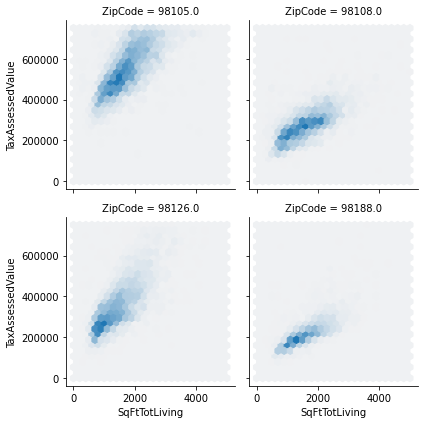

In [23]:
import matplotlib.pyplot as plt


def hexbin(x,y,color,**kwargs):
    cmap = sns.light_palette(color,as_cmap=True)
    plt.hexbin(x,y,gridsize=25,cmap=cmap,**kwargs)

facet = sns.FacetGrid(tax_by_zip,col="ZipCode",col_wrap=2)

facet.map(hexbin,"SqFtTotLiving","TaxAssessedValue",extent=[0,5000,0,750000])